# Обходы графов

В этом ноутбуке мы посмотрим на примеры работы с обходами в графах

In [1]:
# Задаем граф

import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(['A','B','C','D','E','F'])
G.add_edges_from([('A','B'), 
                      ('B','C'), ('B','D'), ('B','E'), 
                      ('C','A'), 
                      ('D','A'), ('D','C'), ('D','E'), 
                      ('F','E')])


nodes=list(G.nodes())
edges=list(G.edges())

print("Список вершин:",nodes)
print("Список ребер:",edges)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Число вершин:",num_nodes)
print("Число ребер:",num_edges)

Список вершин: ['A', 'B', 'C', 'D', 'E', 'F']
Список ребер: [('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'A'), ('D', 'A'), ('D', 'C'), ('D', 'E'), ('F', 'E')]
Число вершин: 6
Число ребер: 9


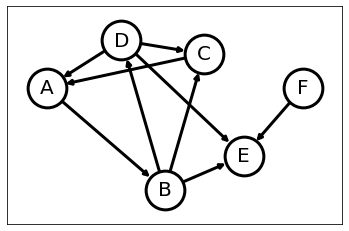

In [2]:
# Рисуем граф

import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}

def draw_G(G, axis=False, pos=None):
    options = {
        "font_size": 20,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
    }

    if axis:
        plt.axis([0, 8.5, -0.5, 2.7])
    nx.draw_networkx(G, pos, **options)
    plt.show()
    
draw_G(G, True, pos)

In [3]:
# Реализуем поиск в глубину без глобальных переменных

pre={}
post={}

def Previsit(v, pre, clock):
    pre[v]=clock
    clock+=1
    return clock

def Postvisit(v, post, clock):
    post[v]=clock
    clock+=1
    return clock

visited=dict()
for v in G:
    visited[v]=False

def Explore(v,graph,pre,post,clock,visited):
    visited[v]=True
    clock = Previsit(v,pre,clock)
    for u in graph[v]:
        if not visited[u]:
            clock = Explore(u,graph,pre,post,clock,visited)
    clock = Postvisit(v,post,clock)
    return clock
            
def dfs(graph,pre,post,visited):
    clock=0
    for v in graph:
        if not visited[v]:
            clock = Explore(v,graph,pre,post,clock,visited)

dfs(G,pre,post,visited)

print("Pre: ",sorted(pre.items()))
print("Post:",sorted(post.items()))

Pre:  [('A', 0), ('B', 1), ('C', 2), ('D', 4), ('E', 5), ('F', 10)]
Post: [('A', 9), ('B', 8), ('C', 3), ('D', 7), ('E', 6), ('F', 11)]


In [4]:
# Находим компоненты сильной связности с помощью встроенной функции

list(nx.strongly_connected_components(G))

[{'E'}, {'A', 'B', 'C', 'D'}, {'F'}]

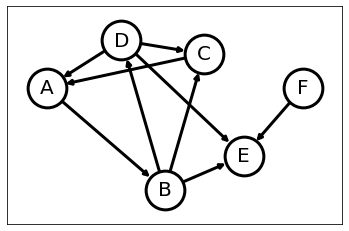

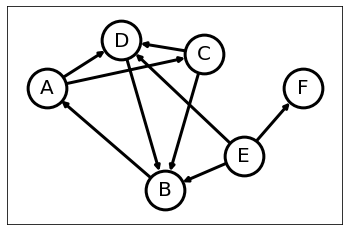

Pre для обратного графа:	 {'A': 0, 'B': 2, 'C': 1, 'D': 4, 'E': 8, 'F': 9}
Post для обратного графа:	 {'A': 7, 'B': 3, 'C': 6, 'D': 5, 'E': 11, 'F': 10}

Очередная компонента состоит из: E 
Очередная компонента состоит из: F 
Очередная компонента состоит из: A B C D 


In [5]:
# Находим компоненты сильной связности

G_r = G.reverse(copy=True)


draw_G(G, True, pos)
draw_G(G_r, True, pos)

# Запускаем поиск в глубину для развернутого графа

pre_r={}
post_r={}
visited_r={}
for v in G_r:
    visited_r[v]=False
dfs(G_r,pre_r,post_r,visited_r)

print("Pre для обратного графа:\t",dict(sorted(pre_r.items())))
print("Post для обратного графа:\t",dict(sorted(post_r.items())))
print()

visited={}
for v in G:
    visited[v]=False

# Запускаем обход компонент связности
while post_r:
    print("Очередная компонента состоит из:",end=" ")
    pre={}
    post={}

    current_v = max(post_r, key=post_r.get)
    Explore(current_v, G, pre, post, 0, visited)
    
    for v, k in visited.items():
        if k and v in post_r:
            print(v,end=" ")
            del post_r[v]
    #print(visited)
    print()

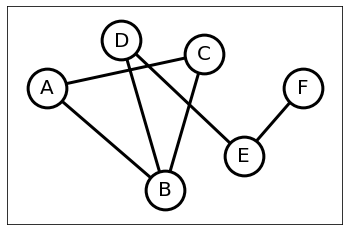

In [6]:
# Задаем неориентированный граф

G = nx.Graph()

G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])

G.add_edges_from([('A','B'), ('B','C'), ('C','A'), ('B','D'), ('F','E'),('D','E')])



draw_G(G, True, pos)

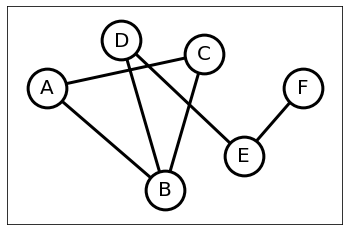

F
{'A': 0, 'B': 1, 'C': 2, 'D': 4, 'E': 5, 'F': 6}


In [10]:
# В этом блоке нужно реализовать удаление вершины из неориентированного графа с сохранением связности

draw_G(G, True, pos)

clock = 0

pre={}
post={}

def Previsit(v):
    global clock
    pre[v]=clock
    clock+=1

def Postvisit(v):
    global clock
    post[v]=clock
    clock+=1

visited={}
for v in G:
    visited[v]=False

def Explore(v):
    visited[v]=True
    Previsit(v)
    for u in G[v]:
        if not visited[u]:
            Explore(u)
    Postvisit(v)
            
def dfs(G):
    for v in G:
        if not visited[v]:
            Explore(v)
            


def vertex_deletion(G):
    dfs(G)
    vertex= max(pre, key=pre.get)
    return vertex
            
    # Добавьте здесь ваше решение
    
    
    
    

print(vertex_deletion(G))
print(pre)

In [11]:
# Запускаем поиск в ширину

from collections import deque

def bfs(G, v):
    dist = {v: 0}
    queue = deque([v])
    
    while queue:
        s = queue.popleft()
        for u in G[s]:
            if u not in dist:
                queue.append(u)
                dist[u] = dist[s] + 1
    return dist

bfs(G,'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 3, 'F': 4}

In [ ]:
# В этом блоке нужно проверить есть ли в данном графе цикл длины не больше 4, проходящий через данную вершину

def test_for_cycle(G, v):
    """
        Проверяет, не проходит ли
        * через вершину v
        * графа G
        * цикл длины не больше 4
    """
    # Инициализация обычного bfs
    dist = { v: 0 }
    # Здесь полезно хранить не только вершину, но и предка
    # При этом для v удобно предка положить чему-то, что не будет мешать
    queue = deque([ (v, v) ])
    # deep --- максимальная глубина,
    # на которой может находиться вершина цикла
    deep = 2

    while queue:
        # Добавьте здесь ваше решение
        
        
    

#G.remove_edge('C','B')
draw_G(G, True, pos)
print(test_for_cycle(G,'A'))
#G.add_edge('C','B')


In [ ]:
H = nx.lollipop_graph(5, 5)

draw_G(H)

In [ ]:
print(test_for_cycle(H,0))

print(test_for_cycle(H,5))
print(test_for_cycle(H,9))


In [ ]:
# В этом блоке мы загружаем амазоновский граф

import networkx as nx

amazon = nx.read_edgelist("amazon0302.txt", create_using=nx.Graph(), nodetype=int, data=False)
amazon = nx.convert_node_labels_to_integers(amazon, ordering='decreasing degree')
nodes = amazon.number_of_nodes()

In [ ]:
print(test_for_cycle(amazon,0))
print(test_for_cycle(amazon,143585))